In [1]:
import numpy as np

In [2]:
class Linear_Regression():
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction = self.predict(self.X)
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self, X):
    return X.dot(self.w) + self.b

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/content/salary_data (1).csv")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
print(data.shape, data.describe, data.isnull().sum())

(30, 2) <bound method NDFrame.describe of     YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872> YearsExperience    0
Salary             0
dtype: int64


In [6]:
# prompt: split the features and target

X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values


In [21]:
# prompt: train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)


In [22]:
model = Linear_Regression(learning_rate = 0.01, no_of_iterations=1000)

In [23]:
model.fit(X_train, Y_train)

In [24]:
print("weight = ", model.w[0])
print("bias = ", model.b)

weight =  9580.301196603597
bias =  23226.38946603212


In [25]:
test_data_prediction = model.predict(X_test)

In [26]:
print(test_data_prediction)

[ 35680.78102162  33764.7207823   66337.74485075  58673.50389347
  91246.52796192  80708.19664565 101784.85927818  51967.29305584
  42386.99185924  88372.43760294]


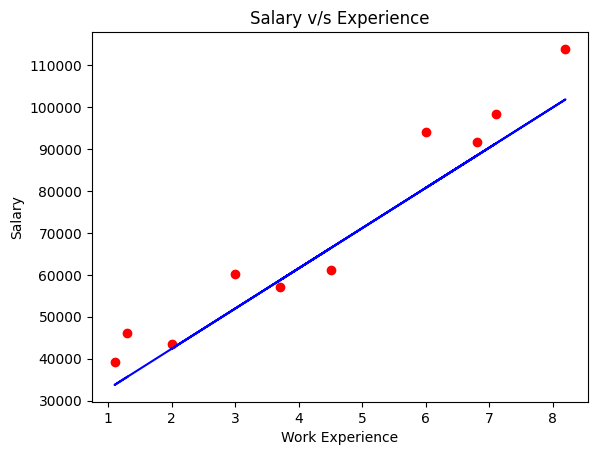

In [27]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary v/s Experience")
plt.show()